# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# ================ *Big Mart Store Sales Prediction* =================

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

## Problem Statement
Nowadays, shopping malls and Big Marts keep track of individual item sales data in order to forecast future client demand and adjust inventory management. In a data warehouse, these data stores hold a significant amount of consumer information and particular item details. By mining the data store from the data warehouse, more anomalies and common patterns can be discovered.

## Approach
The classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering, Model Building and Model Testing. Try out different machine learning algorithms that’s best fit for the above case.

## Result
Build a solution that should able to predict the sales of the different stores of Big Mart according to the provided dataset.

## Dataset
Link: https://www.kaggle.com/brijbhushannanda1979/bigmart-sales-data

# Data Description
Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

## What's in this Notebook?
This notebook contains the Data Exploration, Data Wrangling, Data Cleaning and Feature Engineering of the dataset so that the data becomes suitable to fit any machine learning techniques and algorithms.

In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading dataset
df = pd.read_csv("https://raw.githubusercontent.com/Suvam-Bit/Datasets/main/Store%20Sales%20Prediction/Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Here our target variable will be the Item_Outlet_Sales and others will be the feature variables.

In [3]:
# shape of the data
df.shape

(8523, 12)

So here we have 8523 records having 12 attributes.

In [4]:
# attribute information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


We have 5 numeric attributes and 7 categorical attributes.

In [5]:
# null values proportion
df.isnull().sum()/len(df)

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

We calculated the proportions of the missing values present in each of the attributes.

So we got two attributes, Item_Weight and Outlet_Size, having missing values.

Now we'll drop the Outlet_Identifier column as we found it unnecessary.

In [6]:
# dropping unnecessary columns
df = df.drop(['Outlet_Identifier'], axis = 1)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


Now we would compute Outlet_Age from the Outlet_Establishment_Year and will use Outlet_Age instead of Outlet_Establishment_Year because the outlet age would be more impactful than the establishment year.

In [7]:
# Calculating the Outlate Age till 2020
df['Outlet_Age'] = df['Outlet_Establishment_Year'].apply(lambda x: 2020 - x)

In [8]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,33


In [9]:
# Dropping Outlet_Establishment_Year column
df = df.drop(['Outlet_Establishment_Year'], axis = 1)

In [10]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,33


We'll take a quick look towards the basic stats of the numeric attributes.

In [11]:
# statistical summary of data
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914,22.168133
std,4.643456,0.051598,62.275067,1706.499616,8.371760
min,4.555000,0.000000,31.290000,33.290000,11.000000
25%,8.773750,0.026989,93.826500,834.247400,16.000000
50%,12.600000,0.053931,143.012800,1794.331000,21.000000
75%,16.850000,0.094585,185.643700,3101.296400,33.000000
max,21.350000,0.328391,266.888400,13086.964800,35.000000


# Exploratory Data Analysis

We will do a little bit of EDA to explore different hidden insights.

# ---Univariate Analysis---

### Numeric Variables

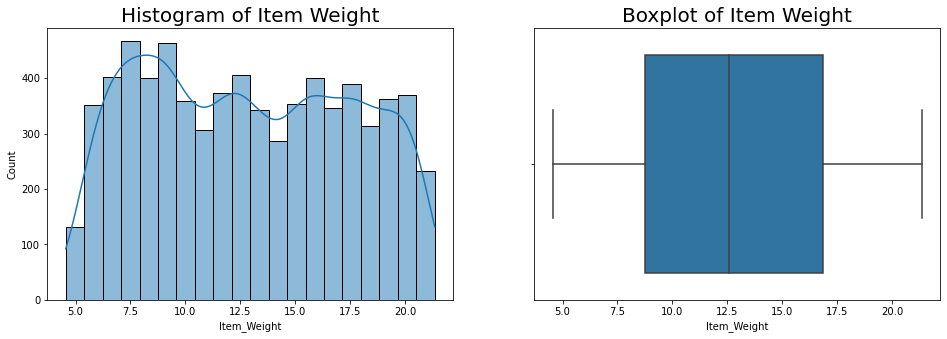

In [12]:
# histogram and boxplot of item weight

plt.figure(figsize = (16,5))

plt.subplot(121)
sns.histplot(data = df, x = 'Item_Weight', kde = True)
plt.title('Histogram of Item Weight', size = 20)

plt.subplot(122)
sns.boxplot(data = df, x = 'Item_Weight')
plt.title('Boxplot of Item Weight', size = 20)

plt.show()

Item Weight is uniformly distributed and there are no outliers.

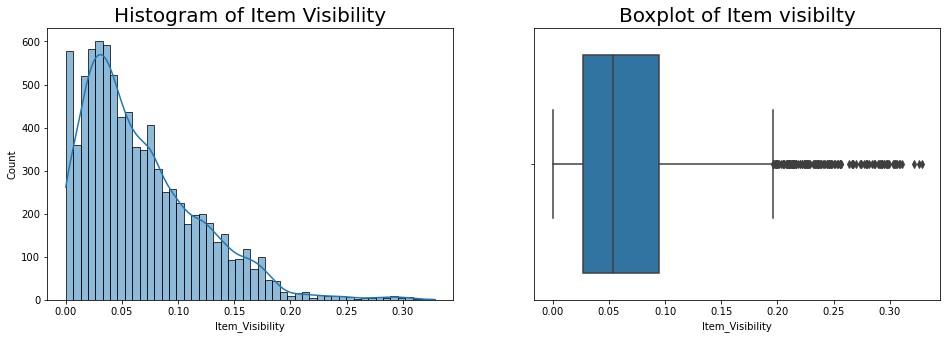

In [13]:
# histogram and boxplot of item visibility

plt.figure(figsize = (16,5))

plt.subplot(121)
sns.histplot(data = df, x = 'Item_Visibility', kde = True)
plt.title('Histogram of Item Visibility', size = 20)

plt.subplot(122)
sns.boxplot(data = df, x = 'Item_Visibility')
plt.title('Boxplot of Item visibilty', size = 20)

plt.show()

Item Visibility is right-skewed distribution and there are a lot of outliers.

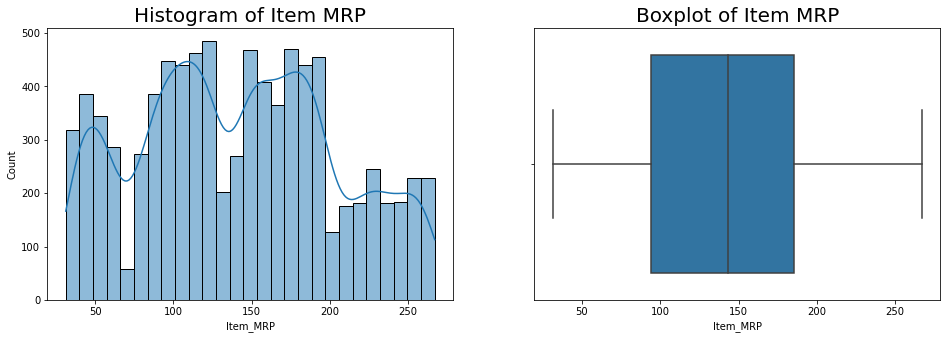

In [14]:
# histogram and boxplot of item MRP

plt.figure(figsize = (16,5))

plt.subplot(121)
sns.histplot(data = df, x = 'Item_MRP', kde = True)
plt.title('Histogram of Item MRP', size = 20)

plt.subplot(122)
sns.boxplot(data = df, x = 'Item_MRP')
plt.title('Boxplot of Item MRP', size = 20)

plt.show()

Item MRP is approximately uniformly distributed and there are no outliers.

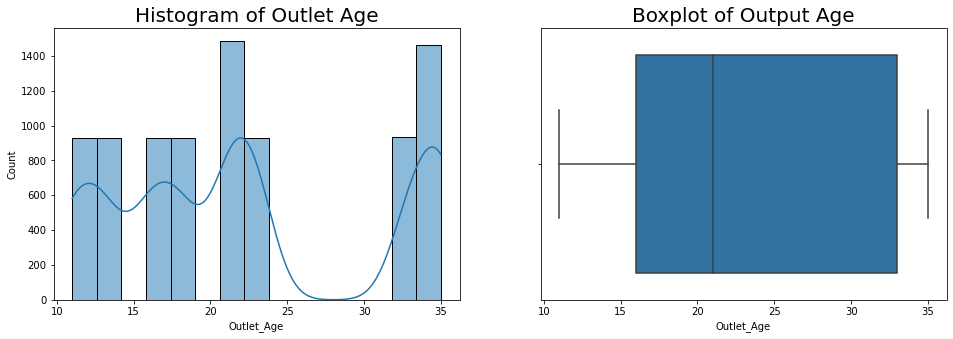

In [15]:
# histogram of Outlet Age

plt.figure(figsize = (16,5))

plt.subplot(121)
sns.histplot(data = df, x = 'Outlet_Age', kde = True)
plt.title('Histogram of Outlet Age', size = 20)

plt.subplot(122)
sns.boxplot(data = df, x = 'Outlet_Age')
plt.title('Boxplot of Output Age', size = 20)

plt.show()

### Categorical Variable

In [16]:
# category counts in item fat content
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Here we can see a lot of redundency present among the different categories of item fat content, like 'Low Fat', 'LF', 'low fat' are the same, and 'Regular', 'reg' are the same.

So we will replace the repeated categories accordingly.

In [17]:
# Correcting the inconsistencies

item_fat_content = df['Item_Fat_Content'].replace('LF', 'Low Fat')
item_fat_content = item_fat_content.replace('low fat', 'Low Fat')
item_fat_content = item_fat_content.replace('reg', 'Regular')

df['Item_Fat_Content'] = item_fat_content

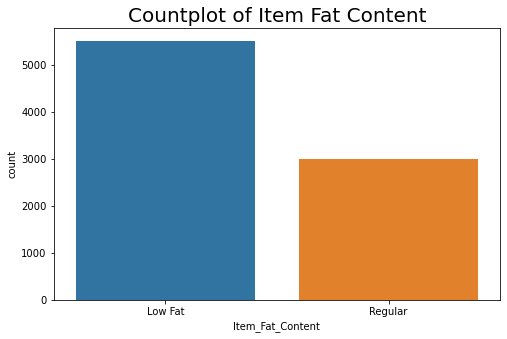

In [18]:
# countplot of item fat content

plt.figure(figsize = (8,5))
sns.countplot(data  = df, x = 'Item_Fat_Content')
plt.title("Countplot of Item Fat Content", size = 20)
plt.show()

Low fat items are more in the stores than regular fat content items.

In [19]:
# category counts in item type
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

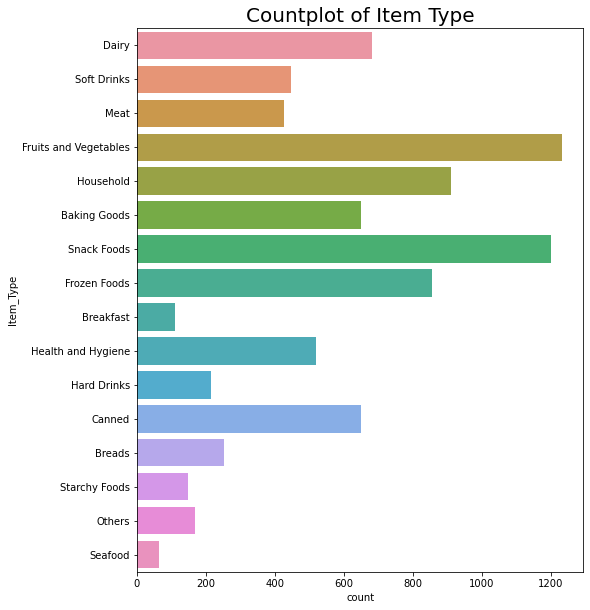

In [20]:
# countplot of item type

plt.figure(figsize = (8,10))
sns.countplot(data  = df, y = 'Item_Type')
plt.title("Countplot of Item Type", size = 20)
plt.show()

People tend to buy fruits and vegetables and snack foods than any other items.

In [21]:
# category counts in outlet size
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

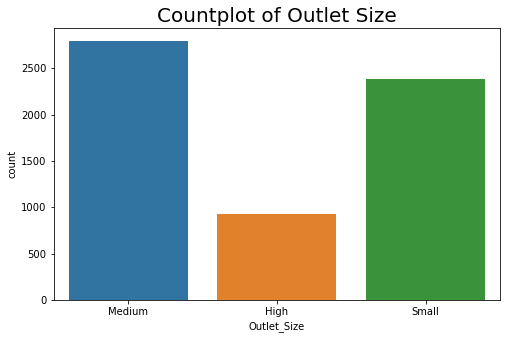

In [22]:
# countplot of outlet size

plt.figure(figsize = (8,5))
sns.countplot(data  = df, x = 'Outlet_Size')
plt.title("Countplot of Outlet Size", size = 20)
plt.show()

Big Mart has Medium and small sized outlets in significantly high numbers than high sized outlets.

In [23]:
# category counts in outlet location type
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

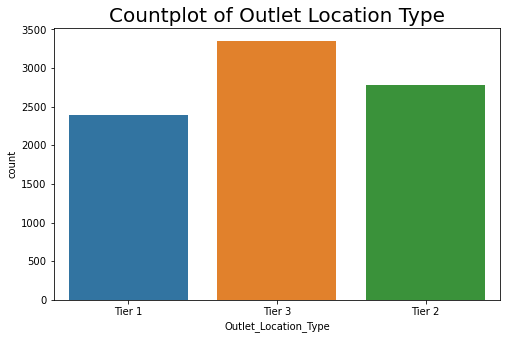

In [24]:
# countplot of outlet size

plt.figure(figsize = (8,5))
sns.countplot(data  = df, x = 'Outlet_Location_Type')
plt.title("Countplot of Outlet Location Type", size = 20)
plt.show()

In [25]:
# category counts in outlet type
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

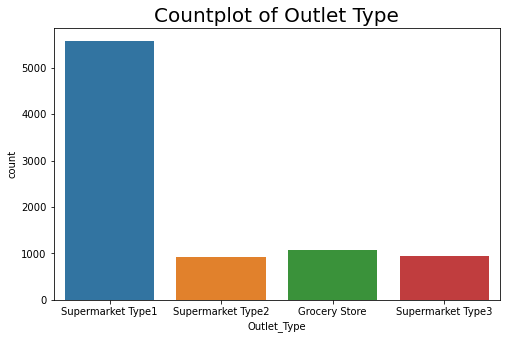

In [26]:
# countplot of outlet type

plt.figure(figsize = (8,5))
sns.countplot(data  = df, x = 'Outlet_Type')
plt.title("Countplot of Outlet Type", size = 20)
plt.show()

We can see an interesting thing that most of the outlets under Big Mart are Super Market Type 1.

# ---Bivariate Analysis---

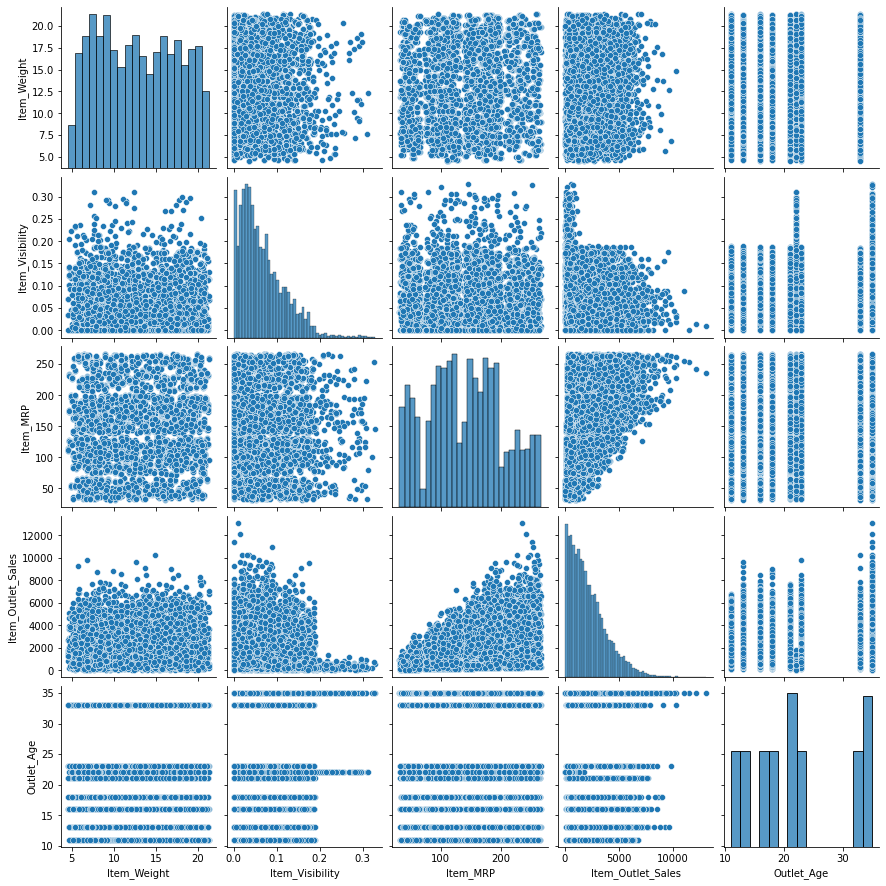

In [27]:
# pair plot

sns.pairplot(df)
plt.show()

We will look for the correlation heatmap to check if there's any multicollinearity present among the feature variables.

In [28]:
# correlation matrix

cor_mat = df.corr()
cor_mat

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age
Item_Weight,1.000000,-0.014048,0.027141,0.014123,0.011588
Item_Visibility,-0.014048,1.000000,-0.001315,-0.128625,0.074834
Item_MRP,0.027141,-0.001315,1.000000,0.567574,-0.005020
Item_Outlet_Sales,0.014123,-0.128625,0.567574,1.000000,0.049135
Outlet_Age,0.011588,0.074834,-0.005020,0.049135,1.000000


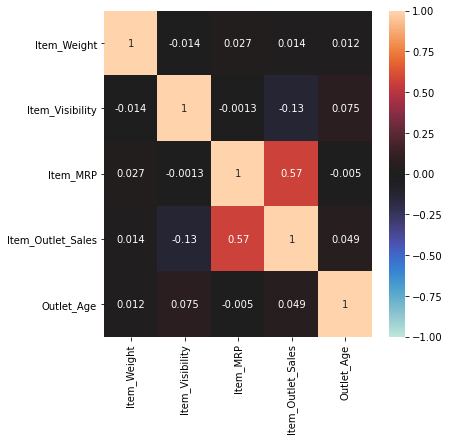

In [29]:
# correlation heatmap

plt.figure(figsize=(6,6))
sns.heatmap(cor_mat, annot = True, vmax = 1, vmin = -1, center = 0)
plt.show()

We cannot see any high correlations among the attributes. So there is no multicollinearity.

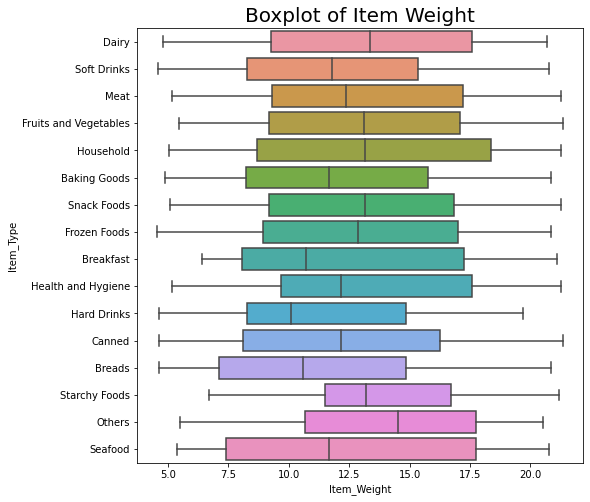

In [30]:
# Boxplot of item weight with respect to Item Type

plt.figure(figsize = (8,8))
sns.boxplot(data = df, x = 'Item_Weight', y = 'Item_Type')
plt.title('Boxplot of Item Weight', size = 20)
plt.show()

Average weights of different type of items are not much differing from each other.

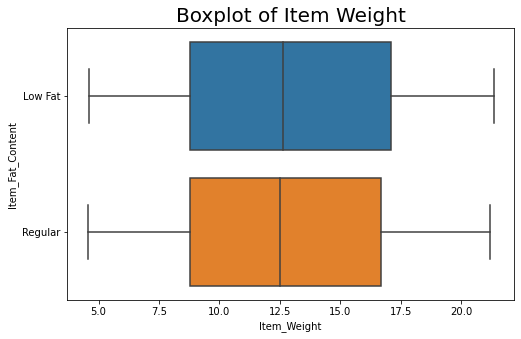

In [31]:
# Boxplot of item weight with respect to Item Fat Content

plt.figure(figsize = (8,5))
sns.boxplot(data = df, x = 'Item_Weight', y = 'Item_Fat_Content')
plt.title('Boxplot of Item Weight', size = 20)
plt.show()

Distributions of item weights for low fat and regular fat items are the same.

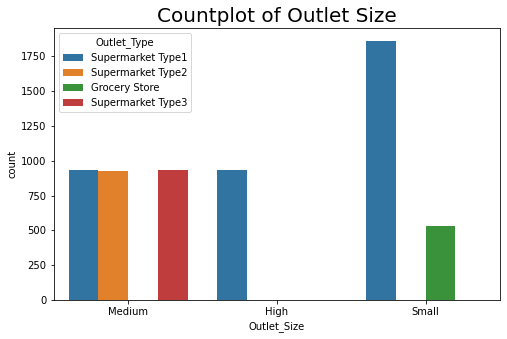

In [32]:
# countplot of outlet size with respect to Outlet Type

plt.figure(figsize = (8,5))
sns.countplot(data  = df, x = 'Outlet_Size', hue = 'Outlet_Type')
plt.title("Countplot of Outlet Size", size = 20)
plt.show()

We found a number of interesting insights.

Most of the Type 1 supermarkets and all the grocery stores are of small size.

All the Type 2 and Type 3 supermarkets are of medium size.

This information we will use for missing value imputation in Outlet Size.

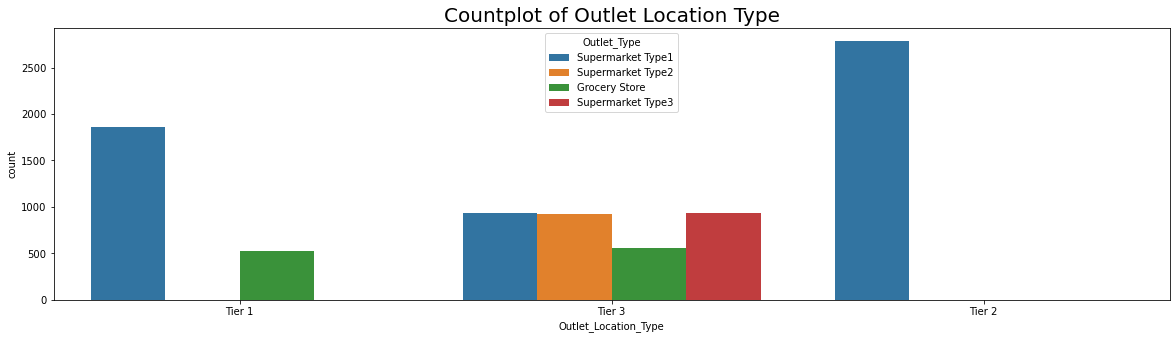

In [33]:
# countplot of outlet location type with respect to Outlet Type

plt.figure(figsize = (20,5))
sns.countplot(data  = df, x = 'Outlet_Location_Type', hue = 'Outlet_Type', )
plt.title("Countplot of Outlet Location Type", size = 20)
plt.show()

Tier 1 locations has only type 1 supermarkets and grocery stores.

Tier 2 locations has only type 1 supermarkets.

Tier 3 locations has all kind of outlets.

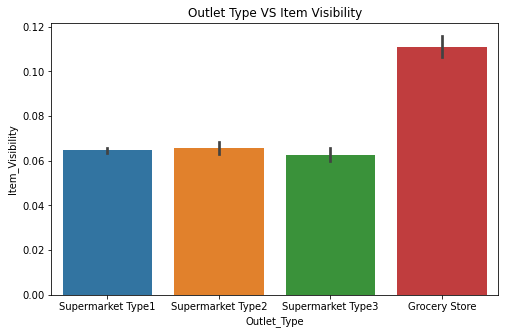

In [34]:
# Outlet Type VS Item Visibility

plt.figure(figsize = (8,5))
sns.barplot(x = df.loc[df.Item_Visibility != 0]['Outlet_Type'], y = df['Item_Visibility'])
plt.title('Outlet Type VS Item Visibility')
plt.show()

Grocery stores are having more item visibility of items than other outlet types.

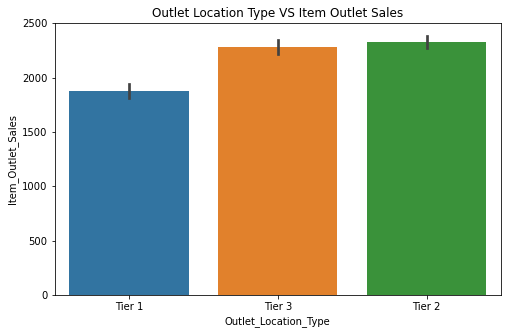

In [35]:
# Outlet Location Type VS Item Outlet Sales

plt.figure(figsize = (8,5))
sns.barplot(x = df['Outlet_Location_Type'], y = df['Item_Outlet_Sales'])
plt.title('Outlet Location Type VS Item Outlet Sales')
plt.show()

Tier 1 has comparatively low sales than other locations.

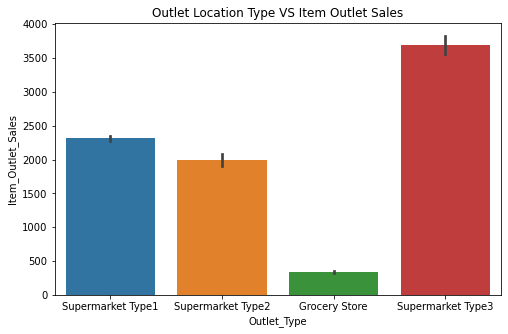

In [36]:
# Outlet Type VS Item Outlet Sales

plt.figure(figsize = (8,5))
sns.barplot(x = df['Outlet_Type'], y = df['Item_Outlet_Sales'])
plt.title('Outlet Location Type VS Item Outlet Sales')
plt.show()

Type 3 supermarkets has the highest sales and grocery stores are lowest.

In [37]:
df2 = df.copy()

# -------------------------------------- CHECKPOINT ------------------------------------------------ 

# Outlier Removal 

We found item Visibility has ouliers and we will remove the outlier using the IQR method.

In [38]:
# Calculating IQR, Upper lavel and Lower level of the distributuion of Item Visibility

IQR = df2['Item_Visibility'].quantile(.75) - df2['Item_Visibility'].quantile(.25)
u_lvl = df2['Item_Visibility'].quantile(.75) + 1.5*IQR
l_lvl = df2['Item_Visibility'].quantile(.25) - 1.5*IQR

print('Item Visibility')
print('IQR: ',IQR)
print('Upper level: ',u_lvl)
print('lower level: ',l_lvl)

Item Visibility
IQR:  0.067595815
Upper level:  0.195979015
lower level:  -0.07440424500000001


In [39]:
# removing outliers
df2.loc[df2['Item_Visibility'] > u_lvl, ['Item_Visibility']] = u_lvl

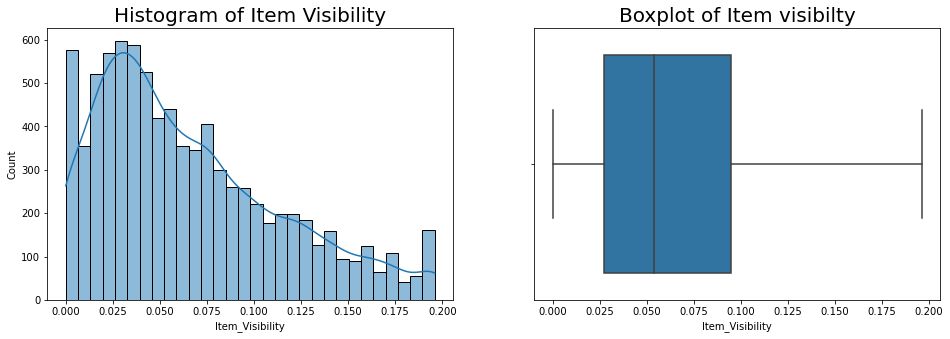

In [40]:
# histogram and boxplot of item visibility

plt.figure(figsize = (16,5))

plt.subplot(121)
sns.histplot(data = df2, x = 'Item_Visibility', kde = True)
plt.title('Histogram of Item Visibility', size = 20)

plt.subplot(122)
sns.boxplot(data = df2, x = 'Item_Visibility')
plt.title('Boxplot of Item visibilty', size = 20)

plt.show()

So all the outliers has been removed.

# Missing value imputation for Outlet Size

We will use the information from the outlet size and outlet type bar chart found in the EDA for missing value imputation.

In [41]:
# Filling missing values according to Remark 5
df2.loc[df2['Outlet_Type'] == 'Grocery Store','Outlet_Size'] = df2.loc[df2['Outlet_Type'] == 'Grocery Store','Outlet_Size'].fillna('Small')
df2.loc[df2['Outlet_Type'] == 'Supermarket Type1','Outlet_Size'] = df2.loc[df2['Outlet_Type'] == 'Supermarket Type1','Outlet_Size'].fillna('Small')
df2.loc[df2['Outlet_Type'] == 'Supermarket Type2','Outlet_Size'] = df2.loc[df2['Outlet_Type'] == 'Supermarket Type2','Outlet_Size'].fillna('Medium')
df2.loc[df2['Outlet_Type'] == 'Supermarket Type3','Outlet_Size'] = df2.loc[df2['Outlet_Type'] == 'Supermarket Type3','Outlet_Size'].fillna('Medium')

In [42]:
# null value count in Outlet Size
df2['Outlet_Size'].isnull().sum()

0

In [43]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Small,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,33


# Replacing Item_Visibility = 0

We will replace the values where item visibility is zero because item visibility = 0 does not make any sense.

We'll try to replace those item visibilities with the mean item visibility of respective item identifier and outlet type.

First we assign item visility 0 with null values.

In [44]:
df2.Item_Visibility = df2.Item_Visibility.replace(0, np.nan)

In [45]:
df2.Item_Visibility.isnull().sum()

526

In [46]:
item_identifier = list(df2['Item_Identifier'].unique())
item_identifier

['FDA15',
 'DRC01',
 'FDN15',
 'FDX07',
 'NCD19',
 'FDP36',
 'FDO10',
 'FDP10',
 'FDH17',
 'FDU28',
 'FDY07',
 'FDA03',
 'FDX32',
 'FDS46',
 'FDF32',
 'FDP49',
 'NCB42',
 'DRI11',
 'FDU02',
 'FDN22',
 'FDW12',
 'NCB30',
 'FDC37',
 'FDR28',
 'NCD06',
 'FDV10',
 'DRJ59',
 'FDE51',
 'FDC14',
 'FDV38',
 'NCS17',
 'FDP33',
 'FDO23',
 'DRH01',
 'NCX29',
 'FDV20',
 'DRZ11',
 'FDX10',
 'FDB34',
 'FDK43',
 'FDA46',
 'FDC02',
 'FDL50',
 'FDM39',
 'NCP05',
 'FDV49',
 'FDL12',
 'FDS02',
 'NCL17',
 'FDM40',
 'FDR13',
 'FDA43',
 'NCP18',
 'FDK21',
 'NCX54',
 'DRK35',
 'FDY21',
 'FDI26',
 'FDM20',
 'FDV27',
 'FDF09',
 'FDY40',
 'FDY45',
 'FDC46',
 'FDH19',
 'FDZ03',
 'DRH37',
 'NCI17',
 'FDJ58',
 'FDH35',
 'FDG02',
 'NCZ18',
 'FDC29',
 'FDQ10',
 'FDN48',
 'FDL04',
 'FDV25',
 'FDD58',
 'FDN04',
 'FDV45',
 'NCL18',
 'FDR12',
 'FDG20',
 'FDZ55',
 'FDQ49',
 'FDN33',
 'FDN27',
 'FDW20',
 'DRG27',
 'DRI25',
 'FDA44',
 'NCR17',
 'FDU04',
 'FDF41',
 'FDB56',
 'FDT28',
 'FDD10',
 'FDW57',
 'DRB48',
 'FDP09',


In [47]:
outlet_type = list(df2['Outlet_Type'].unique())
outlet_type

['Supermarket Type1',
 'Supermarket Type2',
 'Grocery Store',
 'Supermarket Type3']

In [48]:
for item_id in item_identifier:
    for outlet in outlet_type:
        mean = df2.loc[(df2['Outlet_Type'] == outlet) & (df2['Item_Identifier'] == item_id), 'Item_Visibility'].dropna().mean()
        df2.loc[(df2['Outlet_Type'] == outlet) & (df2['Item_Identifier'] == item_id), 'Item_Visibility'] = df2.loc[(df2['Outlet_Type'] == outlet) & (df2['Item_Identifier'] == item_id), 'Item_Visibility'].fillna(mean)

In [49]:
df2.Item_Visibility.isnull().sum()

166

In [50]:
for item_id in item_identifier:
    mean = df2.loc[df2['Item_Identifier'] == item_id, 'Item_Visibility'].dropna().mean()
    df2.loc[df2['Item_Identifier'] == item_id, 'Item_Visibility'] = df2.loc[df2['Item_Identifier'] == item_id, 'Item_Visibility'].fillna(mean)

In [51]:
df2.Item_Visibility.isnull().sum()

0

In [52]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,Small,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.013217,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,33


# Missing Value Imputation for Item Weight

We will replace the missing values in item weight with the the mean item weight of respective item identifiers.

In [53]:
df2.Item_Weight.isnull().sum()

1463

In [54]:
for item_id in item_identifier:
    mean = df2.loc[df2['Item_Identifier'] == item_id, 'Item_Weight'].dropna().mean()
    df2.loc[df2['Item_Identifier'] == item_id, 'Item_Weight'] = df2.loc[df2['Item_Identifier'] == item_id, 'Item_Weight'].fillna(mean)

In [55]:
df2.Item_Weight.isnull().sum()

4

For the remaining missing values we will replace with respect to item type.

In [56]:
df2[df2.Item_Weight.isnull() == True]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,Medium,Tier 3,Supermarket Type3,1569.9564,35
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,Medium,Tier 3,Supermarket Type3,4434.2280,35
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,Medium,Tier 3,Supermarket Type3,3453.5046,35
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,Small,Tier 1,Grocery Store,120.5098,35


In [57]:
item_type = list(df2.Item_Type.unique())
item_type

['Dairy',
 'Soft Drinks',
 'Meat',
 'Fruits and Vegetables',
 'Household',
 'Baking Goods',
 'Snack Foods',
 'Frozen Foods',
 'Breakfast',
 'Health and Hygiene',
 'Hard Drinks',
 'Canned',
 'Breads',
 'Starchy Foods',
 'Others',
 'Seafood']

In [58]:
for item in item_type:
    mean = df2.loc[df2['Item_Type'] == item, 'Item_Weight'].dropna().mean()
    df2.loc[df2['Item_Type'] == item, 'Item_Weight'] = df2.loc[df2['Item_Type'] == item, 'Item_Weight'].fillna(mean)

In [59]:
df2.Item_Weight.isnull().sum()

0

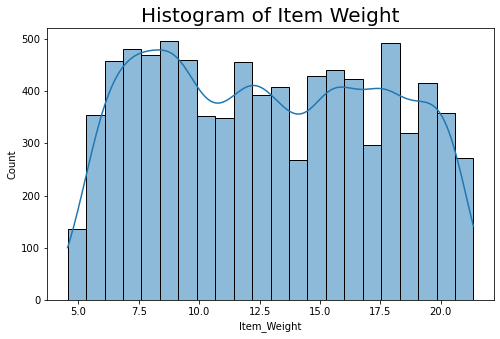

In [60]:
# histogram of item weight

plt.figure(figsize = (8,5))
sns.histplot(data = df2, x = 'Item_Weight', kde = True)
plt.title('Histogram of Item Weight', size = 20)
plt.show()

In [61]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,Small,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.013217,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,33


In [62]:
df2.isnull().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Outlet_Age              0
dtype: int64

In [63]:
df2 = df2.drop('Item_Identifier', axis = 1)

In [64]:
df2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,11
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,Small,Tier 3,Grocery Store,732.3800,22
4,8.93,Low Fat,0.013217,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,33


Before applying one hot encoding on categorical variables we save the the cleaned dataset as .csv file.

In [65]:
df2.to_csv('preprocessed2.csv', index = False)

# One Hot Encoding 

In [66]:
# item fat content

item_fat_content_dummy = pd.get_dummies(df2['Item_Fat_Content'], drop_first=True)
item_fat_content_dummy.head()

,Regular
0,0
1,1
2,0
3,1
4,0


In [67]:
# item type

item_type_dummy = pd.get_dummies(df2['Item_Type'], drop_first=True)
item_type_dummy.head()

,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [68]:
# outlet size

outlet_size_dummy = pd.get_dummies(df2['Outlet_Size'], drop_first=True)
outlet_size_dummy.head()

,Medium,Small
0,1,0
1,1,0
2,1,0
3,0,1
4,0,0


In [69]:
# outlet location type

outlet_location_type_dummy = pd.get_dummies(df2['Outlet_Location_Type'], drop_first=True)
outlet_location_type_dummy.head()

,Tier 2,Tier 3
0,0,0
1,0,1
2,0,0
3,0,1
4,0,1


In [70]:
# outlet type

outlet_type_dummy = pd.get_dummies(df2['Outlet_Type'], drop_first=True)
outlet_type_dummy.head()

,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,0
4,1,0,0


In [71]:
df2 = pd.concat([df2,item_fat_content_dummy, item_type_dummy, outlet_size_dummy,outlet_location_type_dummy,outlet_type_dummy], axis = 1)

In [72]:
df2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,...,Snack Foods,Soft Drinks,Starchy Foods,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,21,...,0,0,0,1,0,0,0,1,0,0
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,11,...,0,1,0,1,0,0,1,0,1,0
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,21,...,0,0,0,1,0,0,0,1,0,0
3,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,Small,Tier 3,Grocery Store,732.3800,22,...,0,0,0,0,1,0,1,0,0,0
4,8.93,Low Fat,0.013217,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,33,...,0,0,0,0,0,0,1,1,0,0


In [73]:
df2 = df2.drop(['Item_Fat_Content', 'Item_Type', 'Outlet_Size','Outlet_Location_Type','Outlet_Type'], axis = 1)
df2.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Regular,Breads,Breakfast,Canned,Dairy,...,Snack Foods,Soft Drinks,Starchy Foods,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,21,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,11,1,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,2097.2700,21,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.022911,182.0950,732.3800,22,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,8.93,0.013217,53.8614,994.7052,33,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [74]:
# null value counts in dataset
df2.isnull().sum()

Item_Weight              0
Item_Visibility          0
Item_MRP                 0
Item_Outlet_Sales        0
Outlet_Age               0
Regular                  0
Breads                   0
Breakfast                0
Canned                   0
Dairy                    0
Frozen Foods             0
Fruits and Vegetables    0
Hard Drinks              0
Health and Hygiene       0
Household                0
Meat                     0
Others                   0
Seafood                  0
Snack Foods              0
Soft Drinks              0
Starchy Foods            0
Medium                   0
Small                    0
Tier 2                   0
Tier 3                   0
Supermarket Type1        0
Supermarket Type2        0
Supermarket Type3        0
dtype: int64

In [75]:
df3 = df2.copy()

# ------------------------------------- CHECKPOINT ------------------------------------------------

In [76]:
df3.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Regular,Breads,Breakfast,Canned,Dairy,...,Snack Foods,Soft Drinks,Starchy Foods,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,21,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,11,1,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,2097.2700,21,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.022911,182.0950,732.3800,22,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,8.93,0.013217,53.8614,994.7052,33,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


# Checking Gaussian Distribution

We will check if the numerical variables can be tranformed to follow Gaussian distribution. We are trying to do this transformation because Linear, Ridge or Lasso regression has the normality assumption of the variables.

We will check the QQ-plot of the varible distribution to determine if that variable is Gaussian distributed or not.

In [77]:
import scipy.stats as stats

def QQ_plot(series):
    
    plt.figure(figsize = (15,6))
    
    plt.subplot(121)
    sns.histplot(series, kde = True)
    
    plt.subplot(122)
    stats.probplot(series, plot = plt)
    
    plt.show()

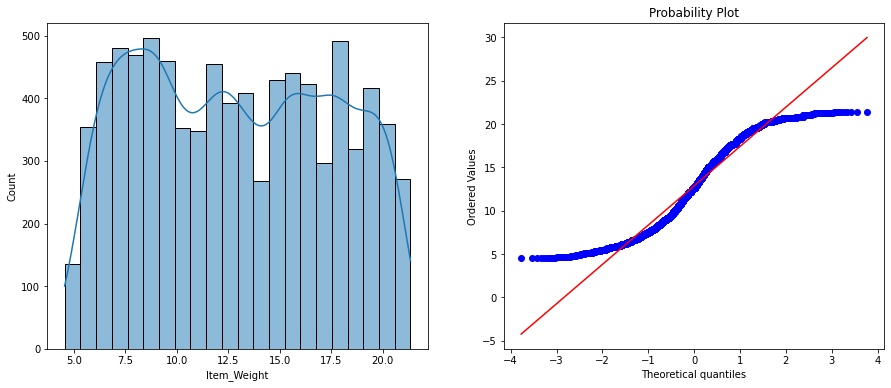

In [78]:
QQ_plot(df3['Item_Weight'])

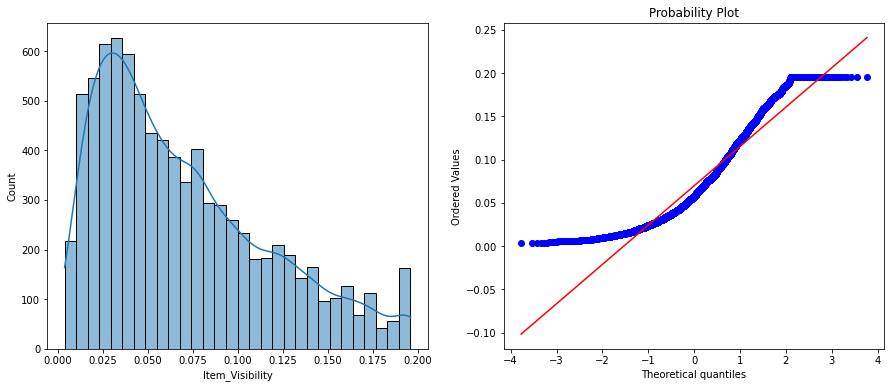

In [79]:
QQ_plot(df3['Item_Visibility'])

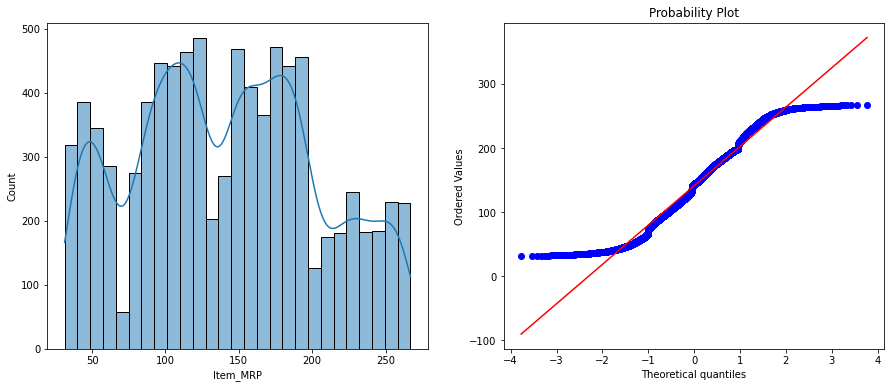

In [80]:
QQ_plot(df3['Item_MRP'])

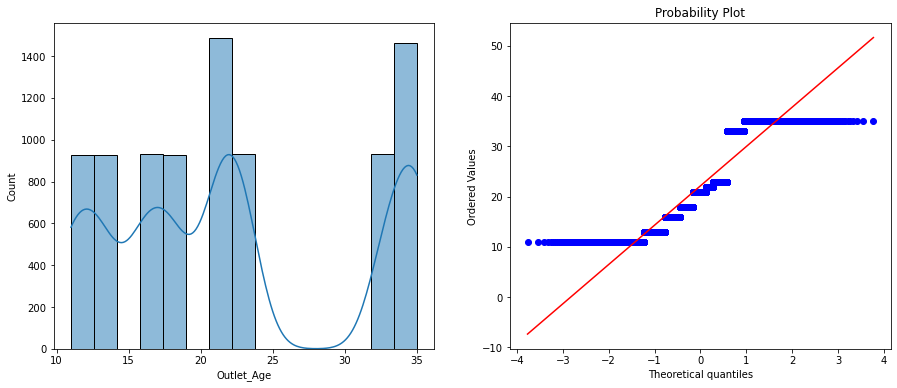

In [81]:
QQ_plot(df3['Outlet_Age'])

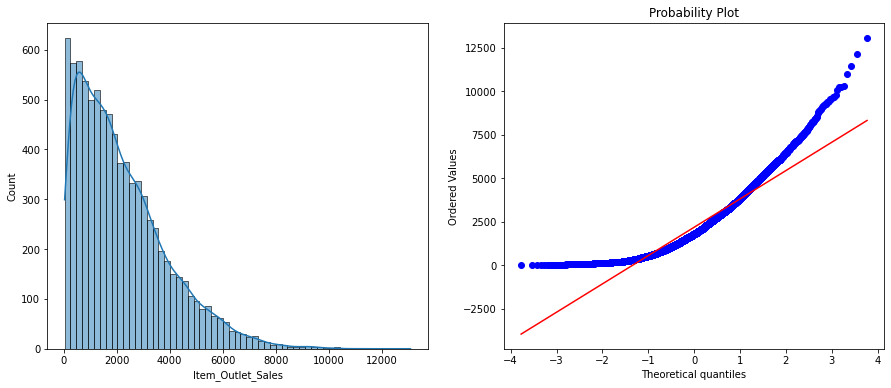

In [146]:
QQ_plot(df3['Item_Outlet_Sales'])

# Tranforming to Gaussian Distribution

#### Tranformation Techniques
1. Log transformation
2. Reciprocal Transformation
3. Square Root Transformation
4. Exponential Tranformation
5. Boxcox Transformation

#### Item Visibility Transformation

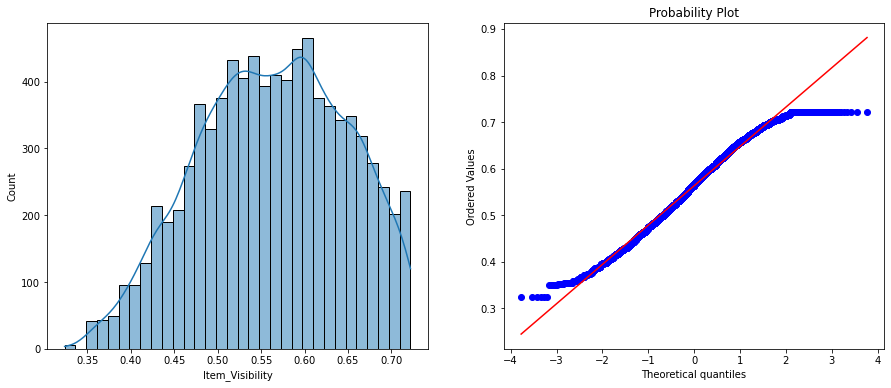

In [82]:
# Using Exponential Transformation
item_visibility_trs = df3['Item_Visibility']**(1/5)
QQ_plot(item_visibility_trs)

#### Item Outlet Sales Transformation

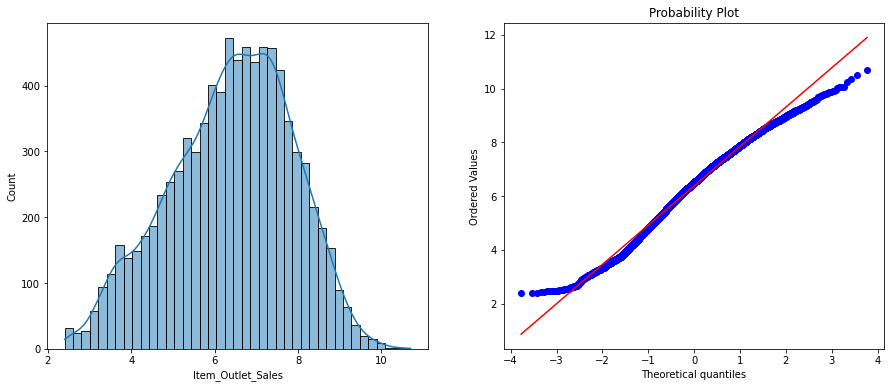

In [150]:
# Using Exponential Transformation
item_outlet_sales_trs = df3['Item_Outlet_Sales']**(1/4)
QQ_plot(item_outlet_sales_trs)

We tried all the transformation techniques on all the numeric variables.

But we found that only the item visibility and item outlet sales can be transformed into Gaussian distribution by exponential transformation. No other variable showed any improvement for any kind of transformation.

This transformation we will use will fitting ML models.

Saving the one hot encoded dataset as .csv file.

In [83]:
df3.to_csv('preprocessed.csv', index = False)